In [1]:
import networkx as nx
import matplotlib.pyplot as plt


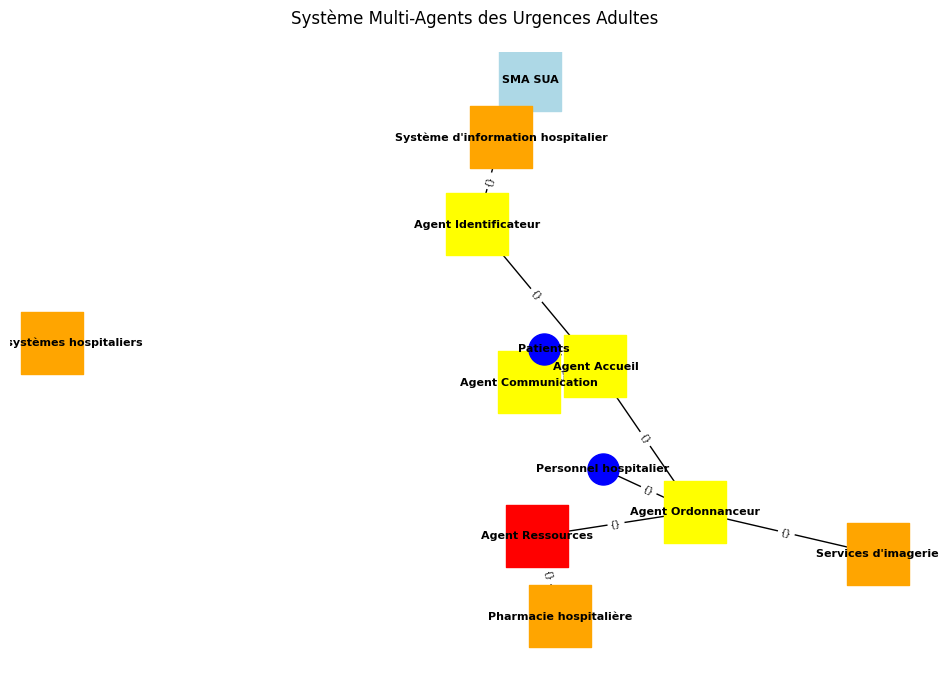

In [2]:
# Création du graphe dirigé
G = nx.DiGraph()

# Ajout des nœuds avec leurs étiquettes et couleurs (SMA spécifique)
nodes = {
    "SMA SUA": {"color": "lightblue", "shape": "rectangle"},
    "Agent Accueil": {"color": "yellow", "shape": "rectangle"},
    "Agent Identificateur": {"color": "yellow", "shape": "rectangle"},
    "Agent Ordonnanceur": {"color": "yellow", "shape": "rectangle"},
    "Agent Communication": {"color": "yellow", "shape": "rectangle"},
    "Agent Ressources": {"color": "red", "shape": "rectangle"},
    "Patients": {"color": "blue", "shape": "circle"},
    "Personnel hospitalier": {"color": "blue", "shape": "circle"},
    "Système d'information hospitalier": {"color": "orange", "shape": "rectangle"},
    "Pharmacie hospitalière": {"color": "orange", "shape": "rectangle"},
    "Services d'imagerie": {"color": "orange", "shape": "rectangle"},
    "Autres systèmes hospitaliers": {"color": "orange", "shape": "rectangle"}
}

# Ajout des nœuds au graphe
for node, attrs in nodes.items():
    G.add_node(node, color=attrs["color"], shape=attrs["shape"])

# Ajout des arêtes (interactions SMA)
edges = [
    ("Patients", "Agent Accueil"),
    ("Patients", "Agent Communication"),
    ("Personnel hospitalier", "Agent Ordonnanceur"),
    ("Agent Accueil", "Agent Identificateur"),
    ("Agent Identificateur", "Système d'information hospitalier"),
    ("Agent Ordonnanceur", "Agent Ressources"),
    ("Agent Communication", "Agent Accueil"),
    ("Agent Accueil", "Agent Ordonnanceur"),
    ("Agent Ressources", "Pharmacie hospitalière"),
    ("Agent Ordonnanceur", "Services d'imagerie")
]

G.add_edges_from(edges)

# Positionnement des nœuds (layout circulaire)
pos = nx.spring_layout(G, seed=42)

# Dessin du graphe
plt.figure(figsize=(12, 8))

# Dessin des nœuds avec couleurs et formes
for node in G.nodes():
    color = nodes[node]["color"]
    if nodes[node]["shape"] == "rectangle":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='s', node_size=2000)
    else:  # Cercle pour les acteurs
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=500)

# Dessin des étiquettes
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

# Dessin des arêtes avec étiquettes
nx.draw_networkx_edges(G, pos, arrows=True)
edge_labels = {(u, v): f"{d}" for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Ajustement du titre et affichage
plt.title("Système Multi-Agents des Urgences Adultes", pad=20)
plt.axis("off")
plt.show()

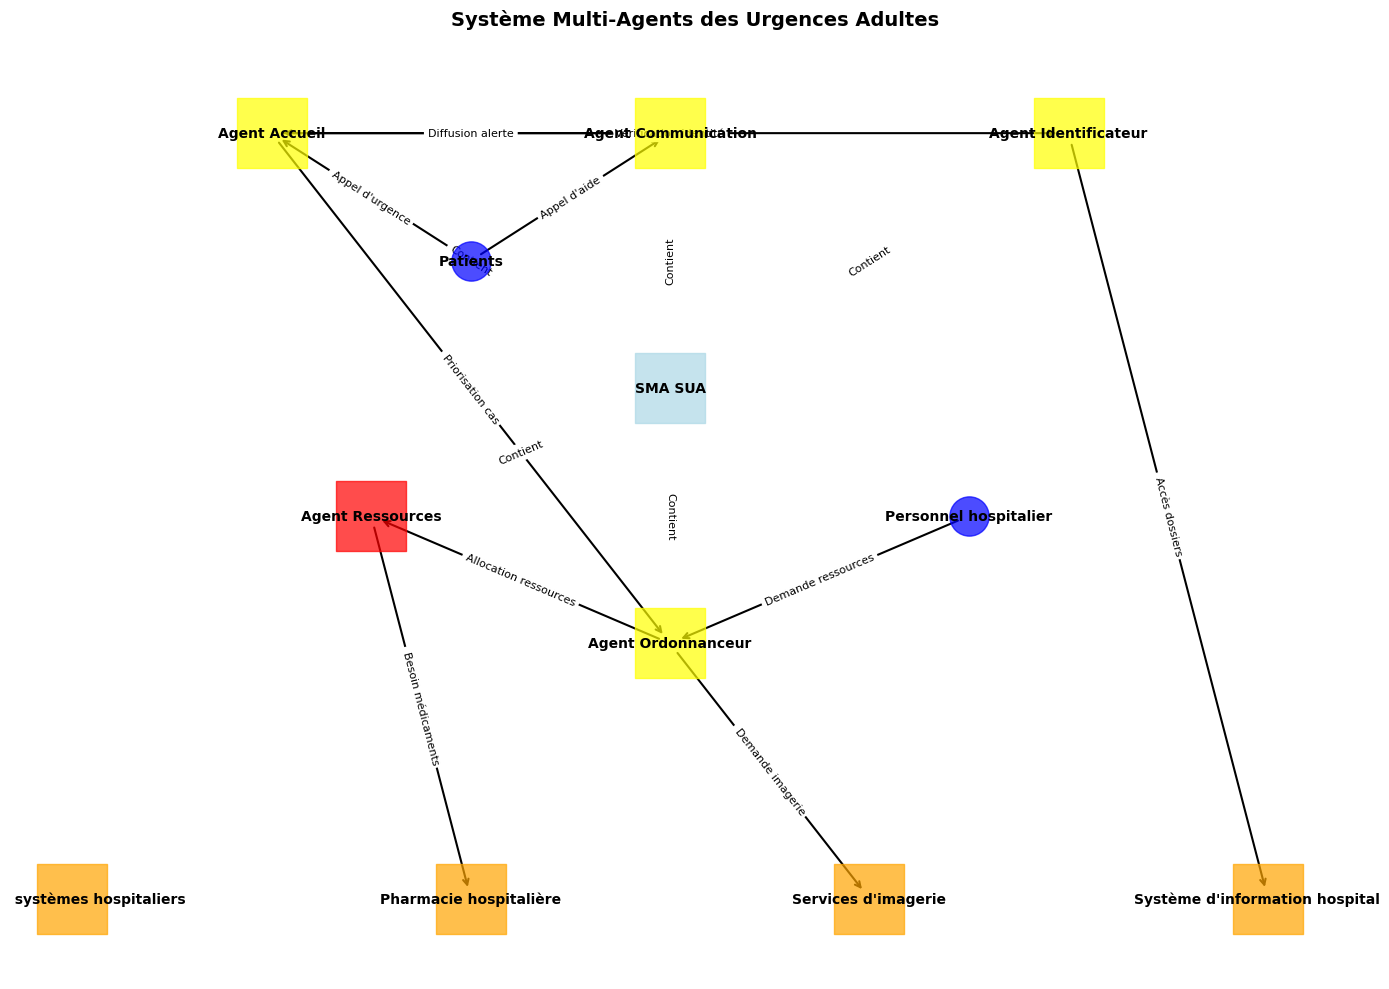

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# Définition des nœuds avec leurs étiquettes, couleurs et formes
nodes = {
    "SMA SUA": {"color": "lightblue", "shape": "rectangle"},
    "Agent Accueil": {"color": "yellow", "shape": "rectangle"},
    "Agent Identificateur": {"color": "yellow", "shape": "rectangle"},
    "Agent Ordonnanceur": {"color": "yellow", "shape": "rectangle"},
    "Agent Communication": {"color": "yellow", "shape": "rectangle"},
    "Agent Ressources": {"color": "red", "shape": "rectangle"},
    "Patients": {"color": "blue", "shape": "circle"},
    "Personnel hospitalier": {"color": "blue", "shape": "circle"},
    "Système d'information hospitalier": {"color": "orange", "shape": "rectangle"},
    "Pharmacie hospitalière": {"color": "orange", "shape": "rectangle"},
    "Services d'imagerie": {"color": "orange", "shape": "rectangle"},
    "Autres systèmes hospitaliers": {"color": "orange", "shape": "rectangle"}
}

# Ajout des nœuds au graphe
for node, attrs in nodes.items():
    G.add_node(node, color=attrs["color"], shape=attrs["shape"])

# Ajout des arêtes (interactions SMA)
edges = [
    ("Patients", "Agent Accueil", "Appel d'urgence"),
    ("Patients", "Agent Communication", "Appel d'aide"),
    ("Personnel hospitalier", "Agent Ordonnanceur", "Demande ressources"),
    ("Agent Accueil", "Agent Identificateur", "Vérification identité"),
    ("Agent Identificateur", "Système d'information hospitalier", "Accès dossiers"),
    ("Agent Ordonnanceur", "Agent Ressources", "Allocation ressources"),
    ("Agent Communication", "Agent Accueil", "Diffusion alerte"),
    ("Agent Accueil", "Agent Ordonnanceur", "Priorisation cas"),
    ("Agent Ressources", "Pharmacie hospitalière", "Besoin médicaments"),
    ("Agent Ordonnanceur", "Services d'imagerie", "Demande imagerie")
]

G.add_edges_from([(u, v) for u, v, _ in edges])

# Positionnement manuel des nœuds pour une disposition claire
pos = {
    "SMA SUA": (0, 0),  # Centre
    "Agent Accueil": (-2, 1),  # Haut gauche
    "Agent Identificateur": (2, 1),  # Haut droit
    "Agent Communication": (0, 1),  # Haut centre
    "Agent Ordonnanceur": (0, -1),  # Bas centre
    "Agent Ressources": (-1.5, -0.5),  # Bas gauche
    "Patients": (-1, 0.5),  # Gauche
    "Personnel hospitalier": (1.5,-0.5),  # Droite
    "Système d'information hospitalier": (3, -2),  # Bas droit
    "Pharmacie hospitalière": (-1, -2),
    "Services d'imagerie": (1, -2),
    "Autres systèmes hospitaliers": (-3, -2)
}

# Dessin du graphe
plt.figure(figsize=(14, 10))

# Dessin des nœuds avec couleurs et formes
for node in G.nodes():
    color = nodes[node]["color"]
    if nodes[node]["shape"] == "rectangle":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='s', node_size=2500, alpha=0.7)
    else:  # Cercle pour les acteurs
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=800, alpha=0.7)

# Dessin des étiquettes avec meilleure lisibilité
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="black")

# Dessin des arêtes avec étiquettes
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=1.5)
edge_labels = {(u, v): d for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

# Ajustement du titre et affichage
plt.title("Système Multi-Agents des Urgences Adultes", pad=20, fontsize=14, fontweight="bold")
plt.axis("off")  # Pas d'axes
plt.tight_layout()
plt.show()

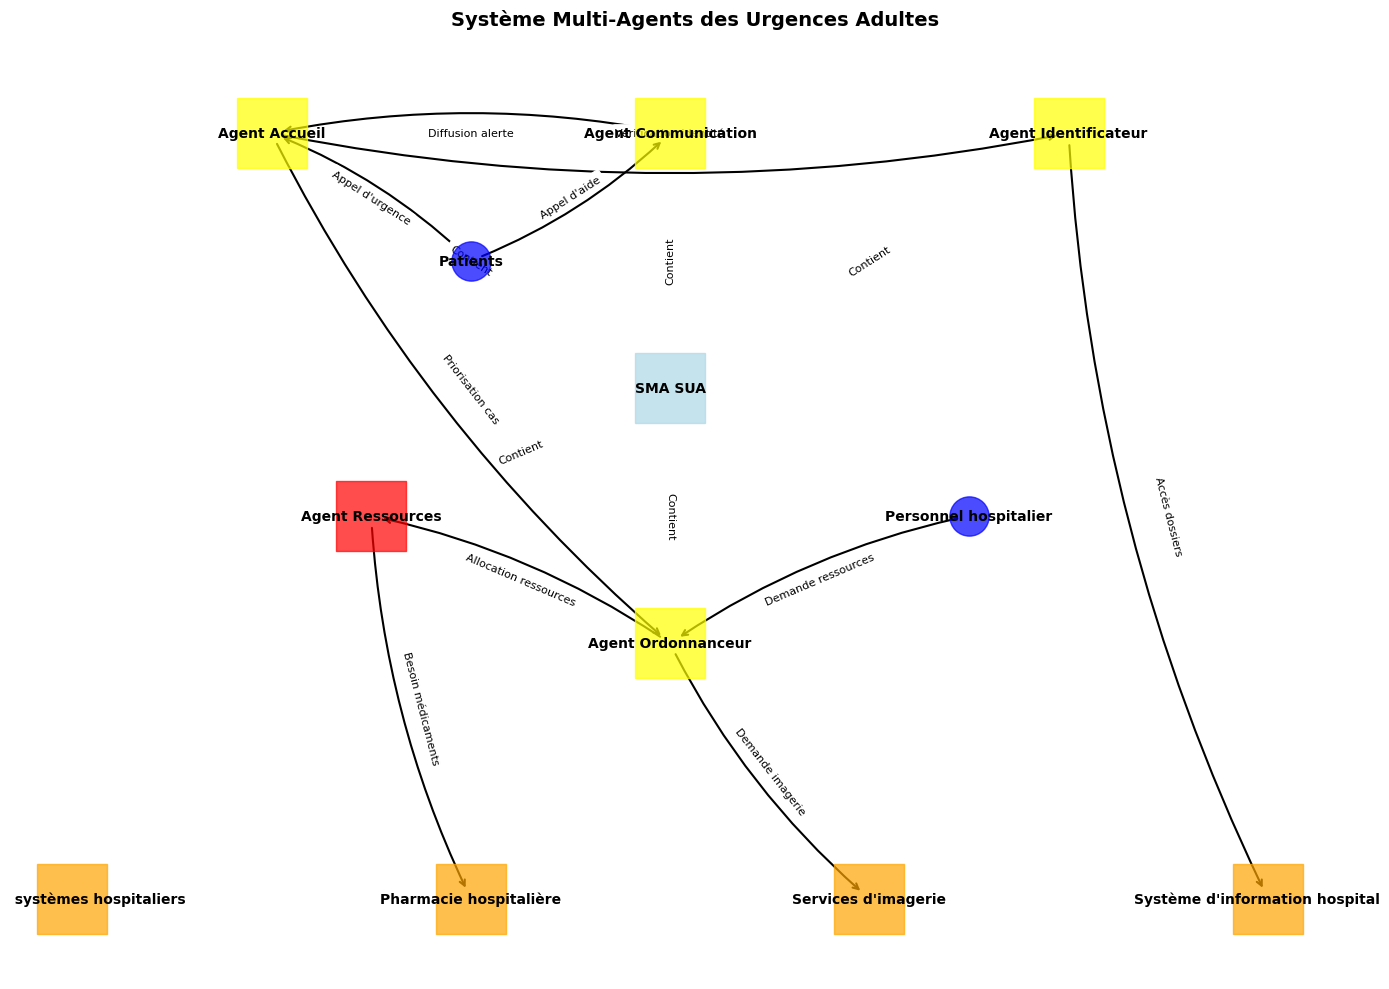

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# Définition des nœuds avec leurs étiquettes, couleurs et formes
nodes = {
    "SMA SUA": {"color": "lightblue", "shape": "rectangle"},
    "Agent Accueil": {"color": "yellow", "shape": "rectangle"},
    "Agent Identificateur": {"color": "yellow", "shape": "rectangle"},
    "Agent Ordonnanceur": {"color": "yellow", "shape": "rectangle"},
    "Agent Communication": {"color": "yellow", "shape": "rectangle"},
    "Agent Ressources": {"color": "red", "shape": "rectangle"},
    "Patients": {"color": "blue", "shape": "circle"},
    "Personnel hospitalier": {"color": "blue", "shape": "circle"},
    "Système d'information hospitalier": {"color": "orange", "shape": "rectangle"},
    "Pharmacie hospitalière": {"color": "orange", "shape": "rectangle"},
    "Services d'imagerie": {"color": "orange", "shape": "rectangle"},
    "Autres systèmes hospitaliers": {"color": "orange", "shape": "rectangle"}
}

# Ajout des nœuds au graphe
for node, attrs in nodes.items():
    G.add_node(node, color=attrs["color"], shape=attrs["shape"])

# Ajout des arêtes (interactions SMA)
edges = [
    ("Patients", "Agent Accueil", "Appel d'urgence"),
    ("Patients", "Agent Communication", "Appel d'aide"),
    ("Personnel hospitalier", "Agent Ordonnanceur", "Demande ressources"),
    ("Agent Accueil", "Agent Identificateur", "Vérification identité"),
    ("Agent Identificateur", "Système d'information hospitalier", "Accès dossiers"),
    ("Agent Ordonnanceur", "Agent Ressources", "Allocation ressources"),
    ("Agent Communication", "Agent Accueil", "Diffusion alerte"),
    ("Agent Accueil", "Agent Ordonnanceur", "Priorisation cas"),
    ("Agent Ressources", "Pharmacie hospitalière", "Besoin médicaments"),
    ("Agent Ordonnanceur", "Services d'imagerie", "Demande imagerie")
]

G.add_edges_from([(u, v) for u, v, _ in edges])

# Positionnement manuel des nœuds pour une disposition claire
pos = {
    "SMA SUA": (0, 0),  # Centre
    "Agent Accueil": (-2, 1),  # Haut gauche
    "Agent Identificateur": (2, 1),  # Haut droit
    "Agent Communication": (0, 1),  # Haut centre
    "Agent Ordonnanceur": (0, -1),  # Bas centre
    "Agent Ressources": (-1.5, -0.5),  # Bas gauche
    "Patients": (-1, 0.5),  # Gauche
    "Personnel hospitalier": (1.5,-0.5),  # Droite
    "Système d'information hospitalier": (3, -2),  # Bas droit
    "Pharmacie hospitalière": (-1, -2),
    "Services d'imagerie": (1, -2),
    "Autres systèmes hospitaliers": (-3, -2)
}

# Ajout des nouvelles arêtes pour relier SMA SUA aux agents
edges.extend([
    ("SMA SUA", "Agent Accueil", "Contient"),
    ("SMA SUA", "Agent Identificateur", "Contient"),
    ("SMA SUA", "Agent Communication", "Contient"),
    ("SMA SUA", "Agent Ordonnanceur", "Contient"),
    ("SMA SUA", "Agent Ressources", "Contient")
])

# Dessin du graphe
plt.figure(figsize=(14, 10))

# Dessin des nœuds avec couleurs et formes
for node in G.nodes():
    color = nodes[node]["color"]
    if nodes[node]["shape"] == "rectangle":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='s', node_size=2500, alpha=0.7)
    else:  # Cercle pour les acteurs
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=800, alpha=0.7)

# Dessin des étiquettes avec meilleure lisibilité
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="black")


# Dessin des arêtes avec étiquettes
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=1.5, connectionstyle='arc3,rad=0.1')
edge_labels = {(u, v): d for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

# Ajustement du titre et affichage
plt.title("Système Multi-Agents des Urgences Adultes", pad=20, fontsize=14, fontweight="bold")
plt.axis("off")  # Pas d'axes
plt.tight_layout()
plt.show()

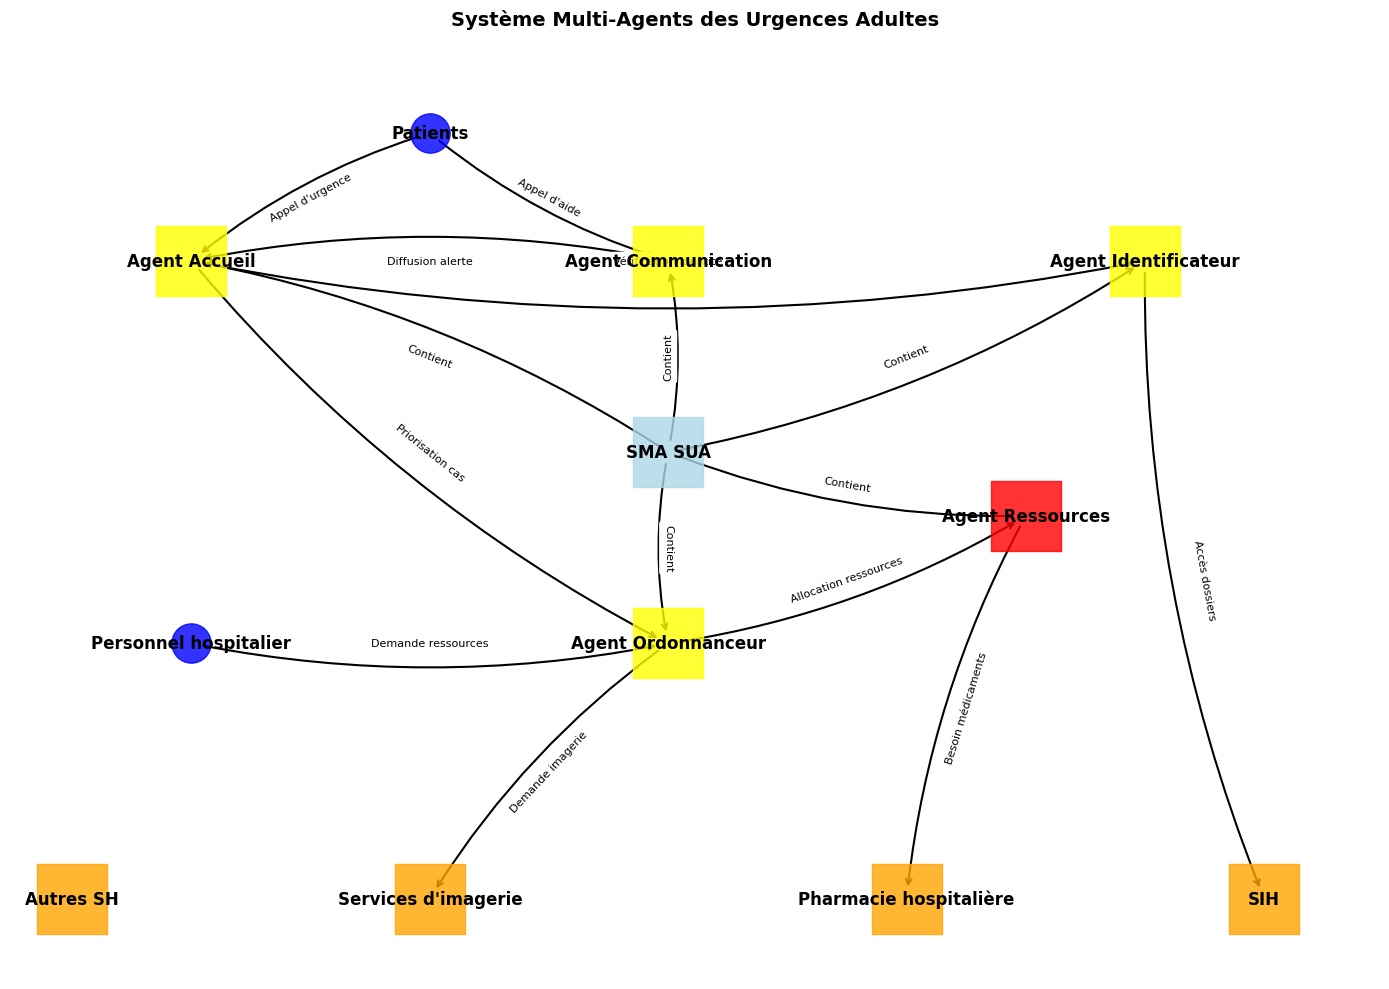

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# Définition des nœuds avec leurs étiquettes, couleurs et formes
nodes = {
    "SMA SUA": {"color": "lightblue", "shape": "rectangle"},
    "Agent Accueil": {"color": "yellow", "shape": "rectangle"},
    "Agent Identificateur": {"color": "yellow", "shape": "rectangle"},
    "Agent Ordonnanceur": {"color": "yellow", "shape": "rectangle"},
    "Agent Communication": {"color": "yellow", "shape": "rectangle"},
    "Agent Ressources": {"color": "red", "shape": "rectangle"},
    "Patients": {"color": "blue", "shape": "circle"},
    "Personnel hospitalier": {"color": "blue", "shape": "circle"},
    "SIH": {"color": "orange", "shape": "rectangle"},
    "Pharmacie hospitalière": {"color": "orange", "shape": "rectangle"},
    "Services d'imagerie": {"color": "orange", "shape": "rectangle"},
    "Autres SH": {"color": "orange", "shape": "rectangle"}
}

# Ajout des nœuds au graphe
for node, attrs in nodes.items():
    G.add_node(node, color=attrs["color"], shape=attrs["shape"])

# Ajout des arêtes (interactions SMA) avec les connexions à SMA SUA
edges = [
    ("Patients", "Agent Accueil", "Appel d'urgence"),
    ("Patients", "Agent Communication", "Appel d'aide"),
    ("Personnel hospitalier", "Agent Ordonnanceur", "Demande ressources"),
    ("Agent Accueil", "Agent Identificateur", "Vérification identité"),
    ("Agent Identificateur", "SIH", "Accès dossiers"),
    ("Agent Ordonnanceur", "Agent Ressources", "Allocation ressources"),
    ("Agent Communication", "Agent Accueil", "Diffusion alerte"),
    ("Agent Accueil", "Agent Ordonnanceur", "Priorisation cas"),
    ("Agent Ressources", "Pharmacie hospitalière", "Besoin médicaments"),
    ("Agent Ordonnanceur", "Services d'imagerie", "Demande imagerie"),
    ("SMA SUA", "Agent Accueil", "Contient"),
    ("SMA SUA", "Agent Identificateur", "Contient"),
    ("SMA SUA", "Agent Communication", "Contient"),
    ("SMA SUA", "Agent Ordonnanceur", "Contient"),
    ("SMA SUA", "Agent Ressources", "Contient")
]

G.add_edges_from([(u, v) for u, v, _ in edges])

# Positionnement manuel des nœuds pour une disposition claire
pos = {
    "SMA SUA": (0, -0.25),  # Centre
    "Agent Accueil": (-2, 0.5),  # Haut gauche
    "Agent Identificateur": (2, 0.5),  # Haut droit
    "Agent Communication": (0, 0.5),  # Haut centre
    "Agent Ordonnanceur": (0, -1),  # Bas centre
    "Agent Ressources": (1.5,-0.5),  # Bas gauche
    "Patients": (-1, 1),  # Gauche
    "Personnel hospitalier": (-2, -1),  # Droite
    "SIH": (2.5, -2),  # Bas droit
    "Pharmacie hospitalière": (1, -2),
    "Services d'imagerie": (-1, -2),
    "Autres SH": (-2.5, -2)
}

# Dessin du graphe
plt.figure(figsize=(14, 10))

# Dessin des nœuds avec couleurs, formes et transparence
for node in G.nodes():
    color = nodes[node]["color"]
    if nodes[node]["shape"] == "rectangle":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='s', node_size=2500, alpha=0.8)
    else:  # Cercle pour les acteurs
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=800, alpha=0.8)

# Dessin des étiquettes avec meilleure lisibilité
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Dessin des arêtes avec étiquettes et flèches courbes
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=1.5, connectionstyle='arc3,rad=0.1')
edge_labels = {(u, v): d for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

# Ajustement du titre et affichage
plt.title("Système Multi-Agents des Urgences Adultes", pad=20, fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

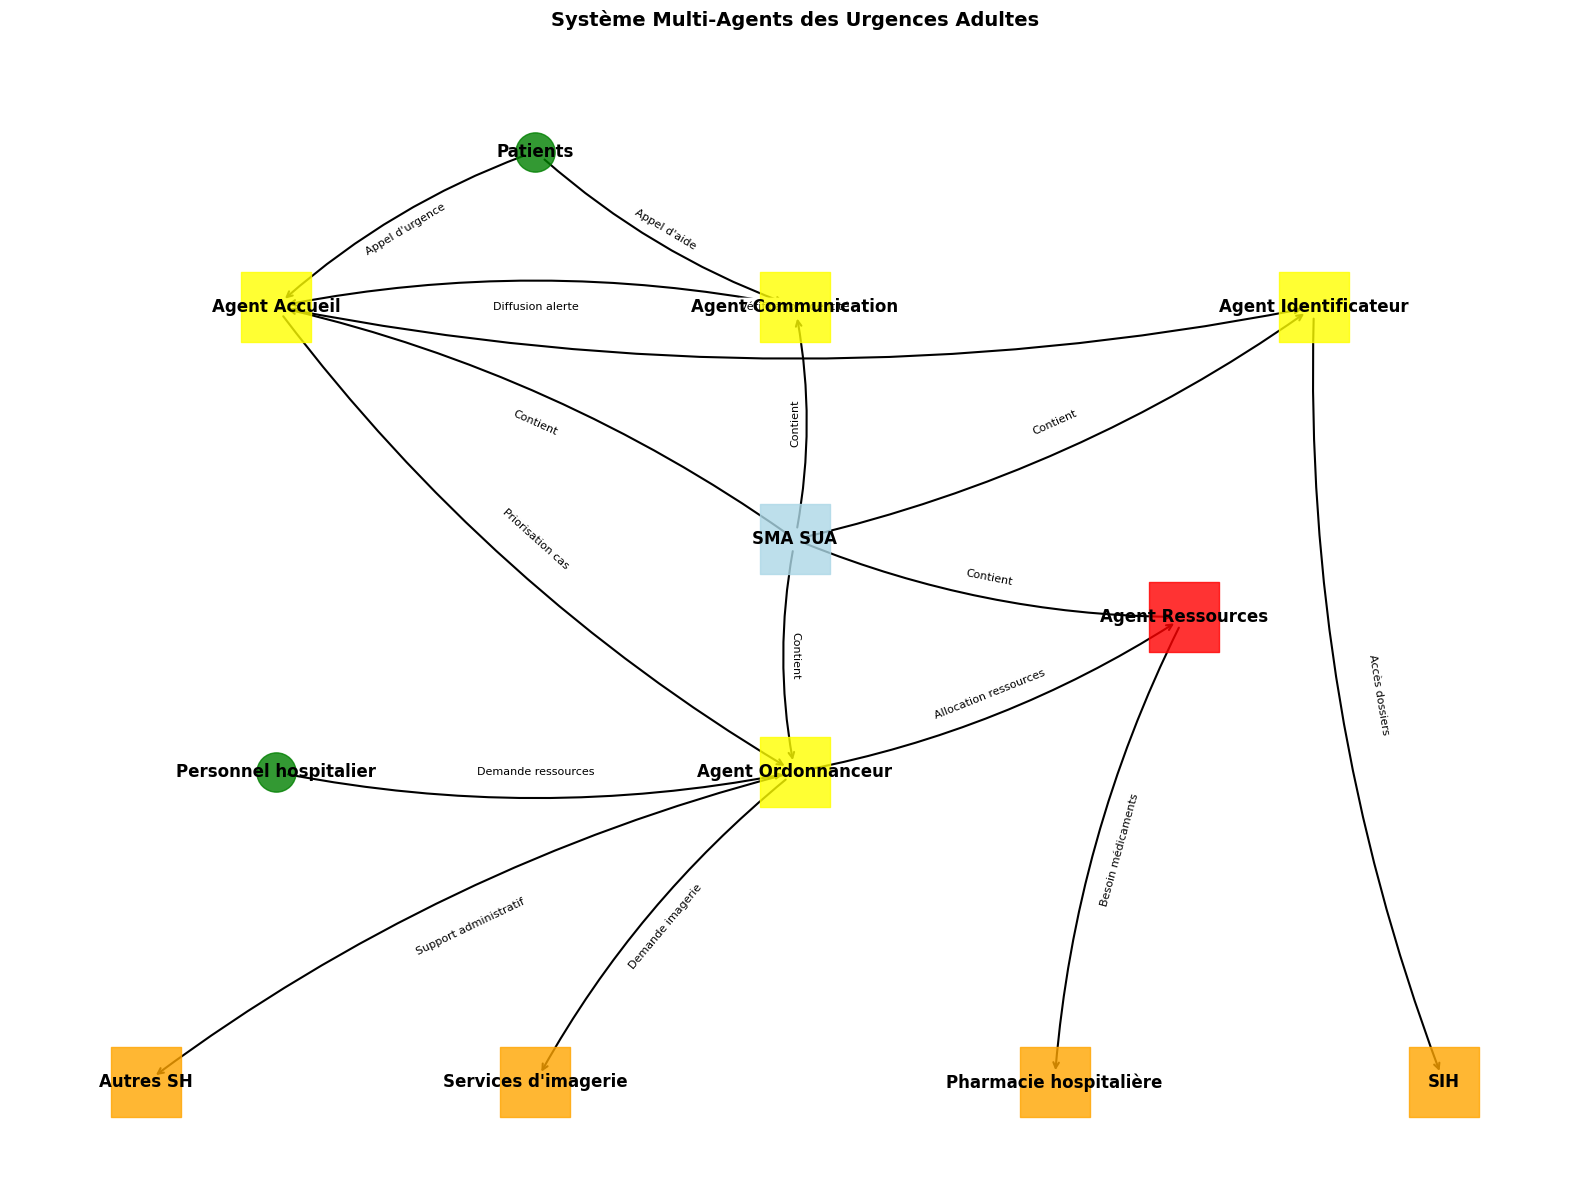

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# Définition des nœuds avec leurs étiquettes, couleurs et formes
nodes = {
    "SMA SUA": {"color": "lightblue", "shape": "rectangle"},
    "Agent Accueil": {"color": "yellow", "shape": "rectangle"},
    "Agent Identificateur": {"color": "yellow", "shape": "rectangle"},
    "Agent Ordonnanceur": {"color": "yellow", "shape": "rectangle"},
    "Agent Communication": {"color": "yellow", "shape": "rectangle"},
    "Agent Ressources": {"color": "red", "shape": "rectangle"},
    "Patients": {"color": "green", "shape": "circle"},
    "Personnel hospitalier": {"color": "green", "shape": "circle"},
    "SIH": {"color": "orange", "shape": "rectangle"},
    "Pharmacie hospitalière": {"color": "orange", "shape": "rectangle"},
    "Services d'imagerie": {"color": "orange", "shape": "rectangle"},
    "Autres SH": {"color": "orange", "shape": "rectangle"}
}

# Ajout des nœuds au graphe
for node, attrs in nodes.items():
    G.add_node(node, color=attrs["color"], shape=attrs["shape"])

# Ajout des arêtes (interactions SMA) avec les connexions à SMA SUA et "Autres systèmes hospitaliers"
edges = [
    ("Patients", "Agent Accueil", "Appel d'urgence"),
    ("Patients", "Agent Communication", "Appel d'aide"),
    ("Personnel hospitalier", "Agent Ordonnanceur", "Demande ressources"),
    ("Agent Accueil", "Agent Identificateur", "Vérification identité"),
    ("Agent Identificateur", "SIH", "Accès dossiers"),
    ("Agent Ordonnanceur", "Agent Ressources", "Allocation ressources"),
    ("Agent Communication", "Agent Accueil", "Diffusion alerte"),
    ("Agent Accueil", "Agent Ordonnanceur", "Priorisation cas"),
    ("Agent Ressources", "Pharmacie hospitalière", "Besoin médicaments"),
    ("Agent Ordonnanceur", "Services d'imagerie", "Demande imagerie"),
    ("SMA SUA", "Agent Accueil", "Contient"),
    ("SMA SUA", "Agent Identificateur", "Contient"),
    ("SMA SUA", "Agent Communication", "Contient"),
    ("SMA SUA", "Agent Ordonnanceur", "Contient"),
    ("SMA SUA", "Agent Ressources", "Contient"),
    ("Agent Ordonnanceur", "Autres SH", "Support administratif")
]

G.add_edges_from([(u, v) for u, v, _ in edges])

# Positionnement manuel des nœuds pour une disposition claire
pos = {
    "SMA SUA": (0, -0.25),  # Centre
    "Agent Accueil": (-2, 0.5),  # Haut gauche
    "Agent Identificateur": (2, 0.5),  # Haut droit
    "Agent Communication": (0, 0.5),  # Haut centre
    "Agent Ordonnanceur": (0, -1),  # Bas centre
    "Agent Ressources": (1.5,-0.5),  # Bas gauche
    "Patients": (-1, 1),  # Gauche
    "Personnel hospitalier": (-2, -1),  # Droite
    "SIH": (2.5, -2),  # Bas droit
    "Pharmacie hospitalière": (1, -2),
    "Services d'imagerie": (-1, -2),
    "Autres SH": (-2.5, -2)
}


# Dessin du graphe
plt.figure(figsize=(16, 12))  # Augmentation de la taille pour plus d’espace

# Dessin des nœuds avec couleurs, formes et transparence
for node in G.nodes():
    color = nodes[node]["color"]
    if nodes[node]["shape"] == "rectangle":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='s', node_size=2500, alpha=0.8)
    else:  # Cercle pour les acteurs
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=color, node_shape='o', node_size=800, alpha=0.8)

# Dessin des étiquettes avec meilleure lisibilité
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")

# Dessin des arêtes avec étiquettes et flèches courbes
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', width=1.5, connectionstyle='arc3,rad=0.1')
edge_labels = {(u, v): d for (u, v, d) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

# Ajustement du titre et affichage
plt.title("Système Multi-Agents des Urgences Adultes", pad=20, fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()